<a href="https://colab.research.google.com/github/Masupa/Customer-Churn-Model/blob/main/Customer_Churn_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations of necessary **libraries**


In [2]:
!pip install streamlit # Streamlit for building UI

     |████████████████████████████████| 7.4MB 4.7MB/s 
     |████████████████████████████████| 112kB 48.1MB/s 
     |████████████████████████████████| 4.4MB 43.7MB/s 
     |████████████████████████████████| 163kB 49.0MB/s 
     |████████████████████████████████| 6.7MB 31.1MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 133kB 46.2MB/s 
     |████████████████████████████████| 122kB 48.4MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=034d7c06071d76200d1e9e6dc80c68d77805634cae5b9dde22410c5afd394494
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=542c574d6d5b1ef49fc77ee32ac80f7bd6f4affcf62d0308e182c76033e52119
  Stored in directory: /root/.c

In [3]:
!pip install pyngrok # ngrok tunnel for web-application

  Created wheel for pyngrok: filename=pyngrok-4.2.2-cp36-none-any.whl size=18025 sha256=0a3abdc0fe2e3b35eea81549b72954261adc80010f285b0d94d4d05f658f9142
  Stored in directory: /root/.cache/pip/wheels/9c/d3/b5/502fbef4b2782a6142bc00c62ccde76ee04c9148fb43b1b2cd
Successfully built pyngrok


In [4]:
!pip install urllib3==1.25.10 

     |████████████████████████████████| 133kB 4.7MB/s 
ERROR: kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.10 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [5]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing (i.e. pd.read_csv)
import seaborn as sns # visualizations
import matplotlib.pyplot as plt # visualizations

%matplotlib inline

In [6]:
# Import data
 
df = pd.read_csv("https://raw.githubusercontent.com/Masupa/Customer-Churn-Model/main/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn%20-%20datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
# Snapshot of data; 5 entries & columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


    From this snapshot, we observe that "customerID" won't help us in creating a churn model, so we delete the
    column.

In [8]:
# Drop "customerID"
df.drop(labels=['customerID'], axis=1, inplace=True)

In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
# Missing Values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Fill "TotalCharges" empty entries with mean of values

total_charges_mean = df['TotalCharges'].mean() # Mean
df['TotalCharges'].fillna(total_charges_mean, inplace=True) # Fillna with Mean

In [12]:
# Keep original dataset
data = df.copy()

#### Feature Extraction

    Observing that most of our features contain non-numerical values, we will encode them; meaning that they will
    be converted from non-numerical to numerical.

In [13]:
# Import LabelEncoder for Encoding
from sklearn.preprocessing import LabelEncoder

# LabelEncoder Function
def label_encoder(data_frame, labels):
    """
        | data_frame: DataFrame contains labels to encode
        | labels: Labels found within the argument DataFrame
    """

    # Initialize LabelEncoder method
    le = LabelEncoder()
    
    for label in labels:
        le.fit(data_frame[label]) # Fit data to LabelEncode
        output = le.transform(data_frame[label]) # Transform the fitted data
        data_frame[label] = pd.Series(data=output) # Re-assign the transfored data to the DataFrame

In [14]:
# List of label names to Encode
encode_label = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Calling label_encoder
label_encoder(data, encode_label)

In [15]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


    Feature Extraction ~ Correlation



In [16]:
corr = data.corr() # Pairwise correlation between features

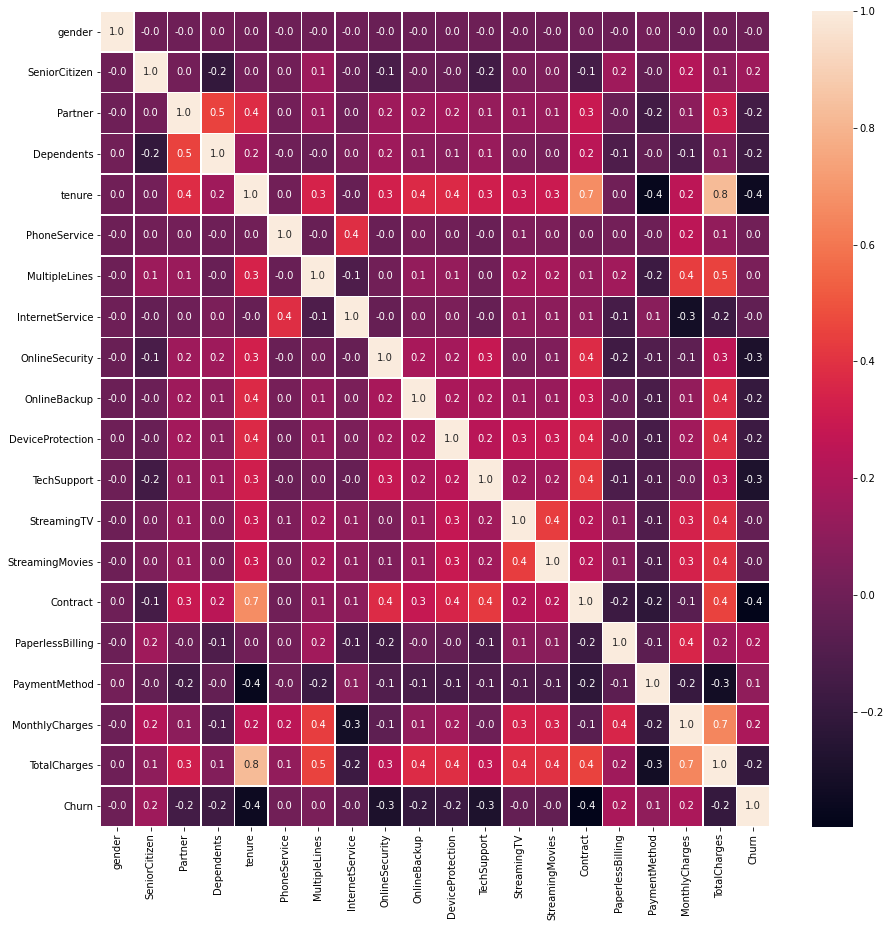

In [17]:
fig, ax = plt.subplots(figsize=(15,15)) # fig & axes objects to control visualizations

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f', ax=ax) # HeatMap to visualize pairwise correlation

Text(0, 0.5, 'Correlation Value')

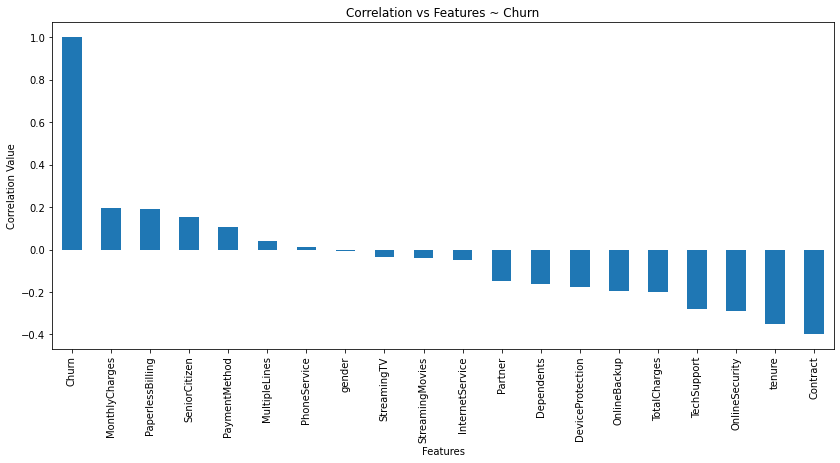

In [18]:
fig, ax = plt.subplots(figsize=(14,6)) # fig & axes objects to control visualizations

corr['Churn'].sort_values(ascending=False).plot(kind='bar') # Bar~plot
ax.set_title("Correlation vs Features ~ Churn")
ax.set_xlabel("Features")
ax.set_ylabel("Correlation Value")

    Note:
    
    * Correlation coefficient ranges between 1.0 and -1.0. 
        - (1.0 shows a perfect positive correlation)
        - (0.0 means no linear relation exists)
        - (-1.0 shows a perfect negative correlation)
        
    * Based on the strength of the correlation, we will pick features with an absolute
      correlation value greater than 1.0.
    
      Hence, these features would be all except "MultipleLines, PhoneService, gender, StreamningTV,
      StreamingMovies, and InternetService".

In [19]:
# Features
features = list()

for feature_name, corr_coeff_ in zip(corr['Churn'].index, corr['Churn'].values):
    
    if feature_name == "Churn":
        pass
    elif abs(corr_coeff_) > 0.1:
        features.append(feature_name)
    pass

print("Selected Features:", features)

Selected Features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


#### Features where customer churn happens



    # Monthly Charges

        Observation:
        - Mean monthly price for customers who had churned was above $70. Nearly, a $10 difference with those customers who didn't churn


Text(0.5, 0.98, 'Mean Monthly Charges by Churn')

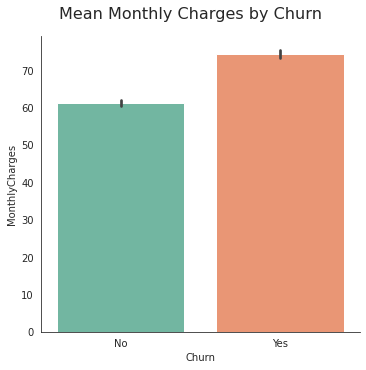

In [76]:
sns.set_style("white")

# df.groupby("Churn").agg(np.mean)['MonthlyCharges'].plot(kind='bar')
g = sns.catplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2", kind="bar")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Monthly Charges by Churn', fontsize=16)

    # Contract

        Observation:
        - Most customers are on a "Month-to-Month" contract.
        - Nearly 2/3 of customers on this contract churn.
        - Customer churn is the least for customers on a "Two-year" contract.

Text(0.5, 0, 'Contract')

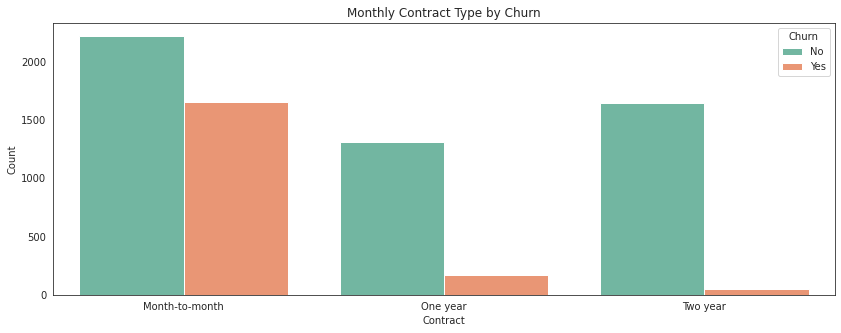

In [64]:
fig, ax = plt.subplots(figsize=(14,5)) # fig & axes objects to control visualizations

sns.countplot(x="Contract", data=df, hue='Churn', palette="Set2")
ax.set_title("Monthly Contract Type by Churn")
ax.set_ylabel("Count")
ax.set_xlabel("Contract")

    # Tenure

         Observations:
         - Mean of those who didn't churn ~ 33
         - Mean of those who churned ~ 18
         - The mean tenure of customers who churned was half that of those who didn't churn.

    # Online Security

        Observations:
        - Customers who churned a lot were those without any "Online Security" service. At the same time, customer churn didn't happen a lot for those without "Online Security" services.
        - For customers who had "Online Security", churn was 1/5 of all.
        - For customer without internet service, churn was the least.

Text(0.5, 0, 'Contract')

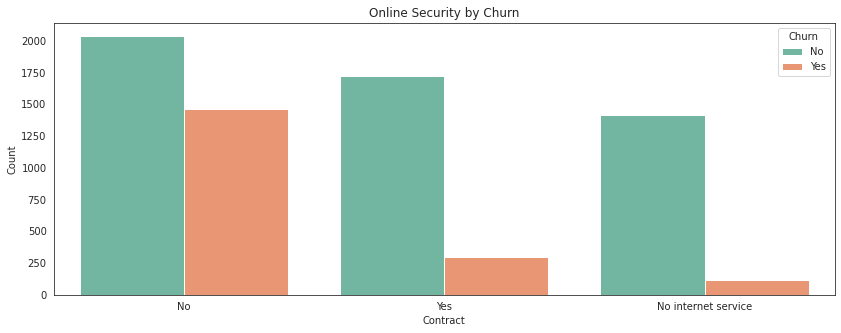

In [83]:
fig, ax = plt.subplots(figsize=(14,5)) # fig & axes objects to control visualizations

sns.countplot(x="OnlineSecurity", data=df, hue='Churn', palette="Set2")
ax.set_title("Online Security by Churn")
ax.set_ylabel("Count")
ax.set_xlabel("Contract")

Text(0.5, 0.98, 'Tenure by Churn')

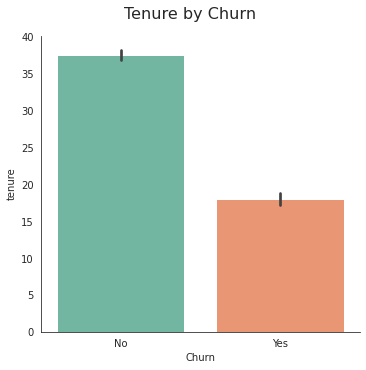

In [82]:
sns.set_style("white")

# df.groupby("Churn").agg(np.mean)['MonthlyCharges'].plot(kind='bar')
g = sns.catplot(x="Churn", y="tenure", data=df, palette="Set2", kind="bar")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Tenure by Churn', fontsize=16)

#### XGBOOST MODEL

    Selected Features

In [85]:
X = data[features] # Feature
y = data.iloc[:, -1] # Label

    # Hyperparameter Tuning with GridSearch & XGBOOST

In [98]:
import xgboost as xgb # import xgboost model

from sklearn.model_selection import GridSearchCV

# Converting data to DMatrix format
churn_dmatrix = xgb.DMatrix(X, y)

# Create the parameter grid: gbm_param_grid
gb_param_grid = {
    'eta': [0.01, 0.1, 0.5, 1],
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the classifier: cg_cl_2
gb_model_1 = xgb.XGBClassifier(objective="binary:logistic")

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gb_model_1, param_grid=gb_param_grid,
                        scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'colsample_bytree': 0.7, 'eta': 0.01, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  0.4429704741737775


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.1s finished


    XGBOOST MODEL

In [99]:
from sklearn.model_selection import train_test_split # split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBOOST Classifier
gb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, max_depth=5, n_estimators=50, colsample_bytree=0.7)

# Classifier Fitting
gb_model.fit(X_train.values, y_train.values)

# Prediction
preds = gb_model.predict(X_test.values)

    Model Evaluation
    
        * The following are some of the metrics we will use the evaluate the accuracy of our model:
          - Confusion Matrix
          - Accuracy
          - ROC AUC value

In [100]:
# Model Accuracy

accuracy = (np.sum(preds == y_test) / y_test.shape[0]) # Correctly predicted / all outcomes
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8062455642299503


In [101]:
# AUC Score

from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, preds)
print("AUC Score: {}".format(auc_score))

AUC Score: 0.7052503959340422


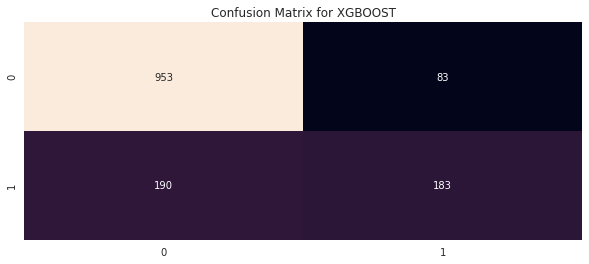

In [102]:
from sklearn.metrics import confusion_matrix # confusion matrix

cm = confusion_matrix(y_test, preds)

# DataFrame contain confusion matrix
df_cm = pd.DataFrame(data=cm)

fig, ax = plt.subplots(figsize=(10,4))

ax.set_title("Confusion Matrix for XGBOOST")
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=ax)

    Saving and loading the Model

In [103]:
import pickle

In [104]:
filename = "xgb_model.pkl"

pickle.dump(gb_model, open(filename, 'wb')) # save model

    # UI ~ WEB APPLICATION

In [109]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import joblib
filename = "xgb_model.pkl"


def encode(zipped_arr):
    """
    :param zipped_arr: an array with feature name and value
    :return: a list of encoded values
    """

    encoded_values = list()

    binary_features = ["Senior Citizen", "Partner", "Dependents", "Paperless Billing"]
    ternary_features = ["Online Security", "Online Backup", "Device Protection", "Tech Support"]

    for feature, value in zipped_arr:

        if feature in binary_features:
            if value == "No":
                encoded_values.append(0)
            else:
                encoded_values.append(1)

        elif feature in ternary_features:
            if value == "No":
                encoded_values.append(0)
            elif value == "Yes":
                encoded_values.append(2)
            else:
                encoded_values.append(1)

        elif feature == "Contract":
            if value == "Month-to-Month":
                encoded_values.append(0)
            elif value == "One year":
                encoded_values.append(1)
            else:
                encoded_values.append(2)

        elif feature == "Payment Method":
            if value == "Electronic Check":
                encoded_values.append(2)
            elif value == "Mailed Check":
                encoded_values.append(3)
            elif value == "Bank Transfer":
                encoded_values.append(0)
            else:
                encoded_values.append(1)
        else:
            encoded_values.append(value)

    return encoded_values


def main():

    title \
        = """ 
        <div style="padding:10px; text-align:center">
            <h1> CUSTOMER CHURN MODEL </h1>    
        </div> """

    message \
        = """
        <div style="padding:10px; text-align:center">
            <h3>Kindly fill-in the following information to predict whether a customer will churn or not.</h3>
        </div>
        """
    encoded_values =[]

    st.markdown(title, unsafe_allow_html=True)
    st.markdown(message, unsafe_allow_html=True)

    citizen = st.selectbox("Senior Citizen", options=["Yes", "No"])
    partner = st.selectbox("Partner", options=["Yes", "No"])
    dependents = st.selectbox("Dependents", options=["Yes", "No"])
    security = st.selectbox("Online Security", options=["Yes", "No", "No Internet Service"])
    backup = st.selectbox("Online Backup", options=["Yes", "No", "No Internet Service"])
    device_protection = st.selectbox("Device Protection", options=["Yes", "No", "No Internet Service"])
    tech_support = st.selectbox("Tech Support", options=["Yes", "No", "No Internet Service"])
    contract = st.selectbox("Contract", options=["Month-to-Month", "One year", "Two year"])
    paperless_billing = st.selectbox("Paperless Billing", options=["Yes", "No"])
    payment_method = st.selectbox("Payment Method", options=["Electronic Check", "Mailed Check", "Bank Transfer", "Credit Card"])
    
    tenure = st.number_input("Tenure", key=1, value=0)
    
    monthly_charges = st.number_input("Monthly Charges", key=2, value=0.0)
    
    total_charges = st.number_input("Total Charges", key=3, value=0.0)

    # User inputs
    churn_inputs = [citizen, partner, dependents, tenure, security, backup, 
                    device_protection, tech_support, contract, paperless_billing, 
                    payment_method, monthly_charges, total_charges]

    # Features
    features = ['Senior Citizen', 'Partner', 'Dependents', 'tenure', 'Online Security', 
                'Online Backup', 'Device Protection', 'Tech Support', 'Contract', 
                'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']

    encoded_values = encode(zip(features, churn_inputs))


    # Click button
    if st.button("Prediction",key='predict'):

      my_array = np.array(encoded_values).reshape(1,-1)

      xgbmodel = pickle.load(open(filename,'rb'))

      y_user_prediction = xgbmodel.predict(my_array)
    
    
      if y_user_prediction == 0:
          st.subheader("Customer will not churn")
      else:
          st.subheader("Customer will churn")
        

if __name__ == '__main__':
    main()


Overwriting app.py


In [106]:
from pyngrok import ngrok

In [110]:
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Support for "return_ngrok_tunnel" as "False" is deprecated and will be removed in 5.0.0, when this method will return a NgrokTunnel instead of a str
  


'http://760c117b328b.ngrok.io'

In [111]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.199.150.63:8501

  Stopping...
